In [1]:
import numpy as np
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
from image_loaders import load_jpeg
# from utils import histogram
from basic_image_transformations import brightness

In [3]:
img = load_jpeg("bahia.jpg")
img.shape

(4000, 6000, 3)

In [4]:
br_img = brightness(img, 100)
# cr_img = contrast(img, 1.5)

In [5]:
# histogram(img)
# histogram(cr_img)

In [6]:
def show_img(img_data):
    display(Image.fromarray(cv.cvtColor(img_data, cv.COLOR_BGR2RGB)))

In [7]:
img.shape

(4000, 6000, 3)

In [35]:
def histogram(img, channels=1):
    '''
    Histogram
    '''
    H, W, C = img.shape
    channel_hist = img.reshape([H*W, C]) # R, G, B

    with plt.style.context("seaborn-v0_8-white"):
        if channels == 3:
            r_hist = channel_hist[:, 0]
            g_hist = channel_hist[:, 1]
            b_hist = channel_hist[:, 2]
            # plt.hist(r_hist, bins=256, color="r")
            # plt.hist(g_hist, bins=256, color="g")
            # plt.hist(b_hist, bins=256, color="b")
            plt.plot(np.log(np.histogram(r_hist, bins=256)[0]), color="r")
            plt.plot(np.log(np.histogram(g_hist, bins=256)[0]), color="g")
            plt.plot(np.log(np.histogram(b_hist, bins=256)[0]), color="b")
        else:
            hist = channel_hist.mean(axis=1)
            counts, bins = np.histogram(hist, bins=256)
            max_y = np.percentile(counts, 99)
            # plt.plot(np.clip(counts, 0, max_y) )
            plt.plot(np.log(counts) )
        plt.show()

In [60]:
def contrast(img, value):
    factor = (259 * (value + 255)) / (255 * (259 - value))
    return np.clip((factor*(img.astype(np.int64)-128)+128), 0, 255)

In [62]:
c = contrast(img, 25)
np.unique(c).shape

(212,)

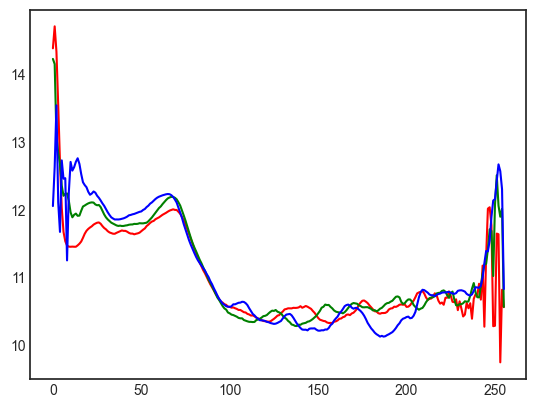

/var/folders/m8/rsc4p3zj0nnfbl933qpf1x400000gn/T/ipykernel_31111/2178177658.py:16: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.histogram(r_hist, bins=256)[0]), color="r")
/var/folders/m8/rsc4p3zj0nnfbl933qpf1x400000gn/T/ipykernel_31111/2178177658.py:17: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.histogram(g_hist, bins=256)[0]), color="g")
/var/folders/m8/rsc4p3zj0nnfbl933qpf1x400000gn/T/ipykernel_31111/2178177658.py:18: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.histogram(b_hist, bins=256)[0]), color="b")


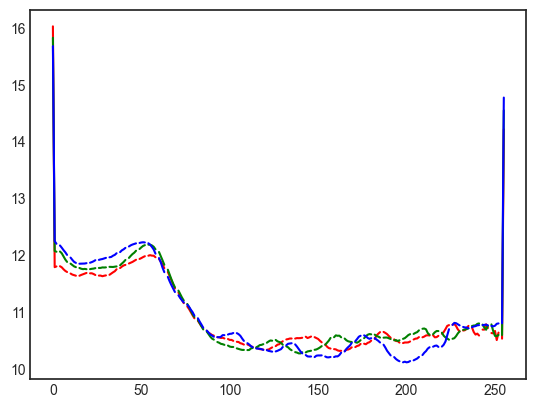

In [37]:
# histogram((img * 1.01).astype(np.uint8), channels=3) 
# histogram(np.clip(img * 1.01, 0, 255), channels=3)
histogram(img, channels=3)
histogram(contrast(img, 25), channels=3)